In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [79]:
humans = pd.read_csv("data/humans.csv")
machines = pd.read_csv("data/machines.csv")
df = pd.concat([humans,machines])
df.drop(columns=["profundidade_max","profundidade_media"],inplace=True)
variable_mapping = {
    'lexical_density': 'LD',
    'lexical_sophistication': 'LS',
    'ttr': 'TTR',
    'd-measure': 'D',
    'token_quantity': 'token_count'
}
df.rename(columns=variable_mapping, inplace=True)

In [80]:
len(humans)

61

In [81]:
df["type"]

0              False
1              False
2              False
3              False
4              False
           ...      
295    gpt-3.5-turbo
296    gpt-3.5-turbo
297    gpt-3.5-turbo
298    gpt-3.5-turbo
299    gpt-3.5-turbo
Name: type, Length: 361, dtype: object

In [82]:
df["type"].unique()

array([False, True, 'gpt-3.5-turbo', 'gpt-4'], dtype=object)

In [83]:
mapp = {x:x for x in df["type"].unique()}
mapp[False] = "not maximum grade"
mapp[True]  = "maximum grade"

In [84]:
df["type"] = df["type"].map(mapp)

In [85]:
df["type"].unique()

array(['not maximum grade', 'maximum grade', 'gpt-3.5-turbo', 'gpt-4'],
      dtype=object)

In [86]:
mapp = {s:"LLM" for s in  df["type"].unique()}
mapp["not maximum grade"] = "human"
mapp["maximum grade"] = "human"
df["model"] = df["type"].map(mapp)

In [87]:
df.sample(11).head()

,MLC,MLS,MLT,DCC,DCT,CPC,CPT,TS,LD,LS,TTR,D,token_count,text,type,model
131,19.655172,35.625000,43.846154,0.620690,1.384615,1.793103,4.000000,0.812500,0.428070,0.954545,0.555340,178.664057,570,A existência de comunidades e povos tradiciona...,gpt-4,LLM
247,18.576923,34.500000,96.600000,0.692308,3.600000,2.500000,13.000000,0.357143,0.391304,0.969697,0.472036,121.281007,483,"No Brasil, a questão da valorização de comunid...",gpt-3.5-turbo,LLM
248,22.791667,42.076923,78.142857,0.750000,2.571429,2.875000,9.857143,0.538462,0.378428,0.967742,0.423459,103.161839,547,A valorização das comunidades e povos tradicio...,gpt-3.5-turbo,LLM
93,23.565217,41.692308,108.400000,0.608696,2.800000,2.956522,13.600000,0.384615,0.385609,0.941176,0.452000,103.608404,542,A valorização de comunidades e povos tradicion...,gpt-3.5-turbo,LLM
23,22.954545,36.071429,84.166667,0.590909,2.166667,3.545455,13.000000,0.428571,0.390099,0.935484,0.463362,110.574616,505,A valorização de comunidades e povos tradicion...,gpt-3.5-turbo,LLM


In [88]:
numeric_columns = df.select_dtypes(include='number').columns
df.groupby("type")[numeric_columns].agg(["mean", "std"]).round(1)

MLC        MLS         MLT        DCC       DCT       ...  \
                   mean  std  mean   std  mean   std mean  std mean  std  ...   
type                                                                      ...   
gpt-3.5-turbo      20.2  3.5  38.5   3.7  93.7  38.2  0.7  0.1  3.3  1.6  ...   
gpt-4              19.5  3.1  35.1   5.3  54.8  11.9  0.7  0.1  1.9  0.5  ...   
maximum grade      19.7  3.9  43.4   7.2  59.5  13.9  0.7  0.1  2.2  0.8  ...   
not maximum grade  16.7  4.8  37.4  10.4  58.9  23.5  0.6  0.1  2.4  1.5  ...   

                    LD        LS       TTR           D       token_count  \
                  mean  std mean  std mean  std   mean   std        mean   
type                                                                       
gpt-3.5-turbo      0.4  0.0  0.9  0.0  0.5  0.0  111.1  11.4       513.9   
gpt-4              0.4  0.0  0.9  0.0  0.5  0.0  132.8  18.8       548.1   
maximum grade      0.4  0.0  0.9  0.0  0.5  0.0  113.5  11.5       650.0   
not maximum grade  0.4  0.0  0.9  0.0  0.5  0.1  136.2  26.7       412.8   

                          
                     std  
type                      
gpt-3.5-turbo       45.1  
gpt-4               68.3  
maximum grade       80.5  
not maximum grade  120.7  

[4 rows x 26 columns]

In [89]:
# sns.pairplot(df,hue="model",diag_kind = "kde")

In [90]:
# sns.pairplot(df,hue="type")

In [91]:
mapp = {s:"LLM" for s in  df["type"].unique()}
mapp["not maximum grade"] = "human"
mapp["maximum grade"] = "human"
df["model"] = df["type"].map(mapp)

In [92]:
df["type"].unique()

array(['not maximum grade', 'maximum grade', 'gpt-3.5-turbo', 'gpt-4'],
      dtype=object)

In [114]:
from scipy.stats import ttest_ind
from scipy.stats import anderson


grouped_data = df.groupby('model')

group1 = grouped_data.get_group("human")
group2 = grouped_data.get_group("LLM")

ttest_results = {
    'Feature': [],
    'T-Statistic': [],
    'P-Value': [],
    'Significant': [],
    'Normality': []
}
for column in df.select_dtypes(include='number').columns:
    # Extract the data for each group for the current column
    data1 = group1[column]
    data2 = group2[column].sample(30)
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(data1, data2)
    
    # Determine if the result is significant (p-value < 0.05)
    significant = p_value < 0.05

    normal = anderson(data1, 'norm').statistic < 0.05
    
    # Store the results in the dictionary
    ttest_results['Feature'].append(column)
    ttest_results['T-Statistic'].append(t_stat)
    ttest_results['P-Value'].append(p_value)
    ttest_results['Significant'].append(significant)
    ttest_results['Normality'].append(normal)

In [115]:
results_df = pd.DataFrame(ttest_results)
results_df.sort_values(by = 'Significant',inplace=True)
results_df

,Feature,T-Statistic,P-Value,Significant,Normality
0,MLC,-1.979830,5.081226e-02,False,False
1,MLS,1.259151,2.112681e-01,False,False
3,DCC,-0.453556,6.512526e-01,False,False
8,LD,-0.611625,5.423452e-01,False,False
9,LS,-0.998783,3.206074e-01,False,False
11,D,1.015141,3.127906e-01,False,False
12,token_count,0.103989,9.174122e-01,False,False
2,MLT,-2.970636,3.820243e-03,True,False
4,DCT,-2.357958,2.056663e-02,True,False
5,CPC,-7.748446,1.421443e-11,True,False


In [116]:
significant_ones = results_df[results_df["Significant"]== True]
significant_ones

,Feature,T-Statistic,P-Value,Significant,Normality
2,MLT,-2.970636,3.820243e-03,True,False
4,DCT,-2.357958,2.056663e-02,True,False
5,CPC,-7.748446,1.421443e-11,True,False
6,CPT,-6.458237,5.453724e-09,True,False
7,TS,5.599492,2.359262e-07,True,False
10,TTR,3.377202,1.087605e-03,True,False


In [117]:
# for feature in significant_ones["Feature"]: 
#     plt.figure(figsize=(10, 6))  # Set figure size
#     ax = sns.displot(data=df, x=feature,hue="type",kind="kde",common_norm=False)
#     plt.show()

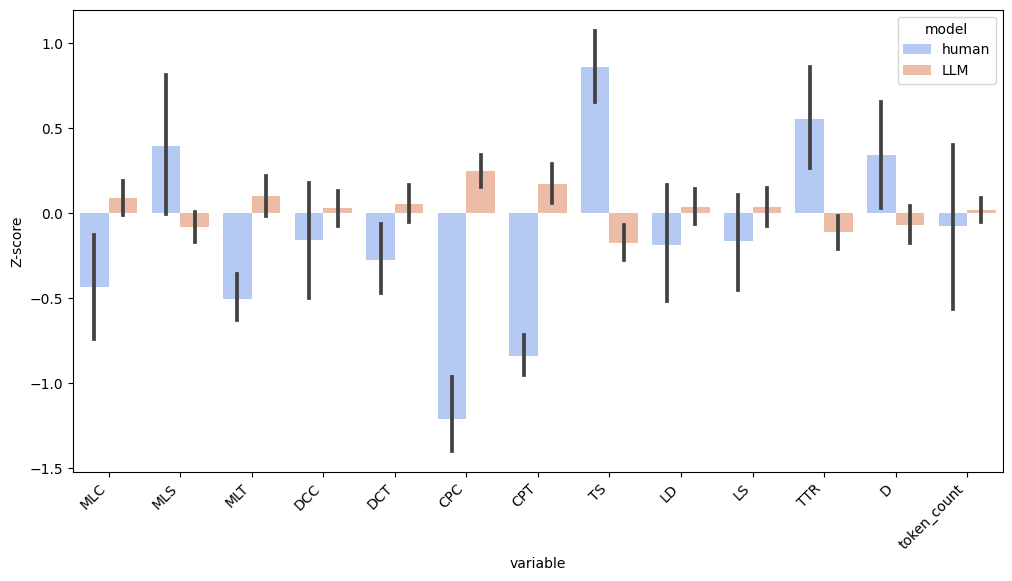

In [118]:
# Plotting
z_scores = df[df.select_dtypes(include='number').columns].apply(lambda x: (x - x.mean()) / x.std())
z_scores["model"] = df["model"]
z_scores_melted  = z_scores.melt(id_vars="model", var_name="variable", value_name="z_score")
plt.figure(figsize=(12, 6))
sns.barplot(data=z_scores_melted, x="variable", y="z_score", hue="model", palette="coolwarm",errorbar="ci")
# plt.xlabel("Variable")
plt.ylabel("Z-score")
# plt.title("Z-score of each variable for each model")
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()


In [119]:
df["class"] = ((df["model"] == "LLM") * df["type"]) + ((df["model"] != "LLM") * df["model"]) 

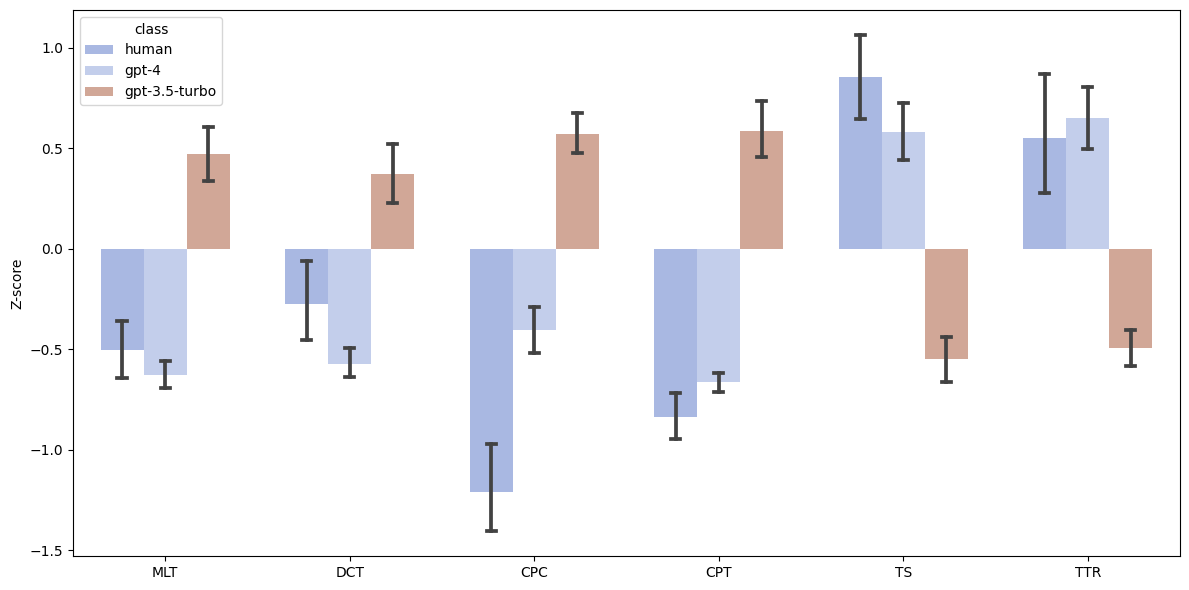

In [179]:
# Plotting
z_scores = df[significant_ones["Feature"]].apply(lambda x: (x - x.mean()) / x.std())
z_scores["class"] = df["class"]
z_scores_melted  = z_scores.melt(id_vars="class", var_name="variable", value_name="z_score")
plt.figure(figsize=(12, 6))

hue_order = ["human", "gpt-4", "gpt-3.5-turbo"]

custom_palette = ["#A0B4EB", "#BDCBF1", "#DBA38D"]  # Example colors

sns.barplot(data=z_scores_melted, x="variable", y="z_score", hue="class", 
            palette=custom_palette,
            hue_order=hue_order,
            errorbar="ci", capsize=.05,
            width=0.7)
plt.xlabel("")
plt.ylabel("Z-score")
plt.tight_layout()
plt.show()


<Axes: xlabel='variable', ylabel='z_score'>

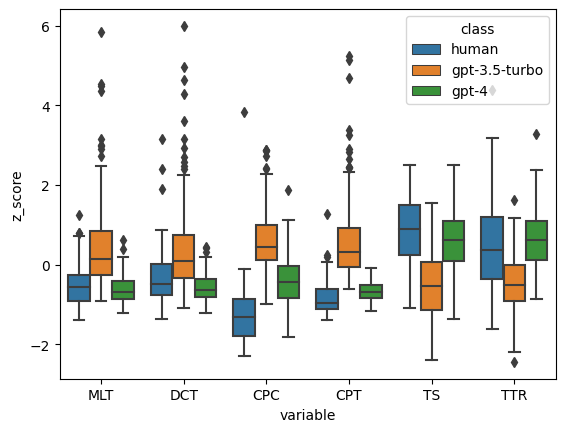

In [137]:
sns.boxplot(data=z_scores_melted, x="variable", y="z_score", hue="class")


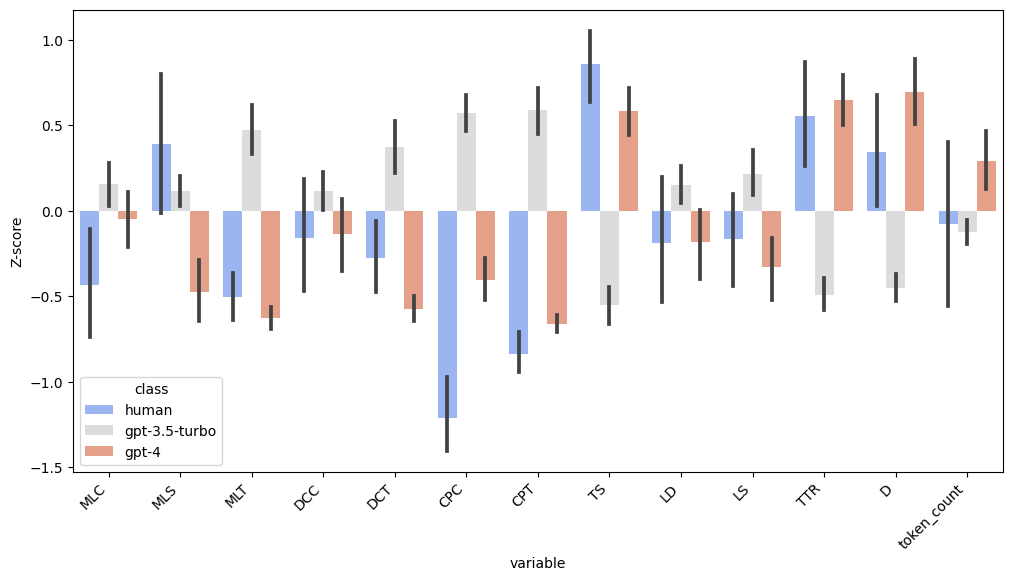

In [157]:
# Plotting
z_scores = df[df.select_dtypes(include='number').columns].apply(lambda x: (x - x.mean()) / x.std())
z_scores["class"] = df["class"]
z_scores_melted  = z_scores.melt(id_vars="class", var_name="variable", value_name="z_score")
plt.figure(figsize=(12, 6))
sns.barplot(data=z_scores_melted, x="variable", y="z_score", hue="class", palette="coolwarm",errorbar="ci")
# plt.xlabel("Variable")
plt.ylabel("Z-score")
# plt.title("Z-score of each variable for each class")
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()
